In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
df = pd.read_csv('final_cleaned_v1.csv')

In [5]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features'],
      dtype='object')

In [6]:
df.drop(columns=['nearbyLocations'], inplace=True)

In [7]:
df.sample(5)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,furnishDetails,features
1630,flat,the close north,sector 50,2.92,11209.0,2605.0,Super Built up area 2605(242.01 sq.m.)Built Up area: 2600 sq.ft. (241.55 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.),3,3,3,Servant Room,10th of 18 Floors,North,5 to 10 Year Old,"['4 Wardrobe', '5 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '12 Light', '1 Chimney', '4 AC', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3652,house,vipul tatvam villa,sector 48,8.25,38194.0,2160.0,Plot area 350(292.64 sq.m.)Built Up area: 300 sq.yards (250.84 sq.m.)Carpet area: 240 sq.yards (200.67 sq.m.),4,4,3+,"Servant Room,Store Room",3.0,North-East,1 to 5 Year Old,"['1 Water Purifier', '11 Geyser', '1 Stove', '8 Light', '8 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Fitness Centre / GYM', 'Club house / Community Center']"
2064,flat,m3m heights,sector 65,1.90,15000.0,1267.0,Super Built up area 1261(117.15 sq.m.),2,2,3,NaN,4th of 34 Floors,NaN,By 2024,[],"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
3773,house,NaN,sector 26,4.00,29630.0,1350.0,Plot area 150(125.42 sq.m.),4,4,3,Store Room,2.0,North,10+ Year Old,"['3 Fan', '6 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Private Garden / Terrace', 'Water Storage', 'No open drainage around', 'Natural Light', 'Airy Rooms', 'Spacious Interiors']"
2571,flat,shapoorji pallonji joyville gurugram,sector 102,1.60,11700.0,1368.0,Built Up area: 1368 (127.09 sq.m.),2,2,3,NaN,14th of 14 Floors,NaN,5 to 10 Year Old,NaN,NaN


# (1) AreaWithType

In [8]:
df[['price','area','areaWithType']].sample(5)

,price,area,areaWithType
3702,6.25,2034.0,Plot area 226(188.96 sq.m.)
1428,1.40,1990.0,Super Built up area 1990(184.88 sq.m.)Built Up area: 1890 sq.ft. (175.59 sq.m.)Carpet area: 1790 sq.ft. (166.3 sq.m.)
608,2.22,1600.0,Super Built up area 2149(199.65 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.)
2784,0.75,1325.0,Super Built up area 1325(123.1 sq.m.)
2137,0.93,1640.0,Built Up area: 1587 (147.44 sq.m.)Carpet area: 1250 sq.ft. (116.13 sq.m.)


In [9]:
# This pattern extract the Super Built-up Area
def get_super_builtup_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return 

In [10]:
df['super_builtup_area_sqft'] = df['areaWithType'].apply(get_super_builtup_area)

In [11]:
df['super_builtup_area_sqft'].isnull().sum()

np.int64(1888)

In [12]:
# This function extracts the Built Up area or Carpet area
def get_area(text,areatype):
    match = re.search( areatype + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))

In [13]:

df['builtup_area'] = df['areaWithType'].apply(lambda x: get_area(x,'Built Up area'))

In [14]:
df['builtup_area'].isnull().sum()

np.int64(2616)

In [15]:
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x,'Carpet area'))

In [16]:
df['carpet_area'].isnull().sum()

np.int64(1859)

In [17]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed

def convert_to_sqft(text,area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)

    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.764  # Convert sq.m. to sqft
    return area_value

In [18]:
# convert to sqft if needed

df['super_builtup_area_sqft'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_builtup_area_sqft']), axis=1)
df['builtup_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['builtup_area']), axis=1)
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [19]:
df[['area', 'areaWithType', 'super_builtup_area_sqft', 'builtup_area', 'carpet_area']].sample(5)

,area,areaWithType,super_builtup_area_sqft,builtup_area,carpet_area
995,2310.0,Super Built up area 2149(199.65 sq.m.),2149.0,NaN,NaN
2498,3225.0,Built Up area: 3225 (299.61 sq.m.),NaN,3225.0,NaN
513,2650.0,Carpet area: 2650 (246.19 sq.m.),NaN,NaN,2650.0
1142,352.0,Carpet area: 360 (33.45 sq.m.),NaN,NaN,360.0
1700,583.0,Super Built up area 583(54.16 sq.m.)Carpet area: 483 sq.ft. (44.87 sq.m.),583.0,NaN,483.0


In [20]:
df[~((df['super_builtup_area_sqft'].isnull()) | (df['builtup_area'].isnull()) |(df['carpet_area'].isnull()))][['area','areaWithType','super_builtup_area_sqft','builtup_area','carpet_area']].sample(5)

,area,areaWithType,super_builtup_area_sqft,builtup_area,carpet_area
1469,3150.0,Super Built up area 3150(292.64 sq.m.)Built Up area: 2800 sq.ft. (260.13 sq.m.)Carpet area: 2400 sq.ft. (222.97 sq.m.),3150.0,2800.0,2400.0
821,2200.0,Super Built up area 2200(204.39 sq.m.)Built Up area: 2100 sq.ft. (195.1 sq.m.)Carpet area: 2000 sq.ft. (185.81 sq.m.),2200.0,2100.0,2000.0
352,2400.0,Super Built up area 2698(250.65 sq.m.)Built Up area: 2490 sq.ft. (231.33 sq.m.)Carpet area: 2400 sq.ft. (222.97 sq.m.),2698.0,2490.0,2400.0
643,2360.0,Super Built up area 2366(219.81 sq.m.)Built Up area: 1963 sq.ft. (182.37 sq.m.)Carpet area: 1629 sq.ft. (151.34 sq.m.),2366.0,1963.0,1629.0
1426,1735.0,Super Built up area 1735(161.19 sq.m.)Built Up area: 1635 sq.ft. (151.9 sq.m.)Carpet area: 1535 sq.ft. (142.61 sq.m.),1735.0,1635.0,1535.0


In [21]:
df[df['areaWithType'].str.contains('Plot')][['area','areaWithType','super_builtup_area_sqft','builtup_area','carpet_area']].sample(5)

,area,areaWithType,super_builtup_area_sqft,builtup_area,carpet_area
3067,3150.0,Plot area 14(354.1 sq.m.),NaN,NaN,NaN
3396,450.0,Plot area 50(41.81 sq.m.),NaN,NaN,NaN
3565,360.0,Plot area 360(33.45 sq.m.),NaN,NaN,NaN
3440,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
2959,1760.0,Plot area 240(200.67 sq.m.),NaN,NaN,NaN


In [22]:
df[(df['super_builtup_area_sqft'].isnull()) & (df['builtup_area'].isnull()) & (df['carpet_area'].isnull())][['area','areaWithType','super_builtup_area_sqft','builtup_area','carpet_area']].sample(5)

,area,areaWithType,super_builtup_area_sqft,builtup_area,carpet_area
3050,1503.0,Plot area 167(139.63 sq.m.),NaN,NaN,NaN
2978,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
3362,713.0,Plot area 713(66.24 sq.m.),NaN,NaN,NaN
3438,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN
3123,900.0,Plot area 900(83.61 sq.m.),NaN,NaN,NaN


In [23]:
all_nan_index = df[(df['super_builtup_area_sqft'].isnull()) & (df['builtup_area'].isnull()) & (df['carpet_area'].isnull())][['super_builtup_area_sqft','builtup_area','carpet_area']].index

Maximum of the nan values are of the areawith Plot area.  
Now we will extract the plot areas and replace all of the nan values of builtup_area beacuse they are very simillar of kind.

In [24]:
def plot_area(text):
    match = re.search(r'Plot area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None


In [25]:
df.loc[all_nan_index, 'builtup_area'] = df.loc[all_nan_index, 'areaWithType'].apply(plot_area)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            3803 non-null   object 
 1   society                  3316 non-null   object 
 2   sector                   3803 non-null   object 
 3   price                    3785 non-null   float64
 4   price_per_sqft           3785 non-null   float64
 5   area                     3785 non-null   float64
 6   areaWithType             3803 non-null   object 
 7   bedRoom                  3803 non-null   int64  
 8   bathroom                 3803 non-null   int64  
 9   balcony                  3803 non-null   object 
 10  additionalRoom           2216 non-null   object 
 11  floorNum                 3784 non-null   object 
 12  facing                   2698 non-null   object 
 13  agePossession            3802 non-null   object 
 14  furnishDetails          

# (2) Additional Rooms

In [27]:
df['additionalRoom'].value_counts()

additionalRoom
Servant Room                                     705
Study Room                                       250
Others                                           225
Pooja Room                                       165
Study Room,Servant Room                           99
Store Room                                        99
Pooja Room,Servant Room                           82
Pooja Room,Study Room,Servant Room,Store Room     72
Servant Room,Others                               60
Pooja Room,Study Room,Servant Room                55
Pooja Room,Study Room,Servant Room,Others         54
Servant Room,Pooja Room                           38
Servant Room,Store Room                           33
Study Room,Others                                 29
Pooja Room,Study Room                             22
Pooja Room,Others                                 17
Pooja Room,Store Room                             15
Servant Room,Study Room                           12
Pooja Room,Store Room,Study Roo

In [28]:
df['additionalRoom'] = df['additionalRoom'].fillna('NA')


In [29]:
df['additionalRoom'] = df['additionalRoom'].str.lower()

In [30]:
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

In [31]:
# create binary OHE for each cols

for cols in new_cols:
    df[cols] = df['additionalRoom'].str.contains(cols).astype(int)

In [32]:
df[['additionalRoom','study room','servant room', 'store room', 'pooja room', 'others']].sample(5)

,additionalRoom,study room,servant room,store room,pooja room,others
2596,na,0,0,0,0,0
525,others,0,0,0,0,1
722,"servant room,pooja room",0,1,0,1,0
2319,servant room,0,1,0,0,0
2716,study room,1,0,0,0,0


# (3) agePossesion

In [33]:
df['agePossession'].value_counts()

# (1) Within 3 months , Within 6 months , 0 to 1 Year Old
# (2) 1 to 5 Year Old
# (3) 5 to 10 Year Old
# (4) 10+ Year Old
# (5) Undefined
# (6) Under Construction

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Jun 2024                 7
Dec 2025                 7
Aug 2023                 7
Nov 2023                 5
Jul 2024                 4
Aug 2024                 4
Oct 2023                 4
By 2025                  4
Sep 2023                 4
May 2024                 3
Nov 2024                 3
Feb 2024                 3
Jan 2025                 3
Jul 2025                 2
Sep 2025                 2
Apr 2026                 2
Dec 2026                 2
By 2027                  2
Oct 2025                 2
Aug 2025                 2
Jul 2027                 2
Jun 2027      

In [34]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [35]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [36]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

# (4) furnishDetails

In [37]:
df['furnishDetails'].sample(5)

1696         ['7 Wardrobe', '7 Fan', '1 Exhaust Fan', '19 Light', '1 Modular Kitchen', '6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']
3260                                                                                                                                                                                                                                                                      NaN
2808                                                                                                                                                                                                                                                                       []
2026                                                                                                                                                                                          

In [38]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]



<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_12780\1707760021.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [39]:
furnishings_df.drop(columns=['furnishDetails'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12780\466072287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'], inplace=True)


In [40]:
furnishings_df.sample(2)

,Exhaust Fan,Modular Kitchen,Curtains,TV,Water Purifier,Dining Table,Stove,Chimney,Fan,Wardrobe,AC,Sofa,Bed,Microwave,Geyser,Washing Machine,Light,Fridge
1460,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1715,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [42]:
x = furnishings_df.values

In [43]:
x = StandardScaler().fit_transform(x)

In [44]:
wcv = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,n_init=10,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcv.append(kmeans.inertia_)


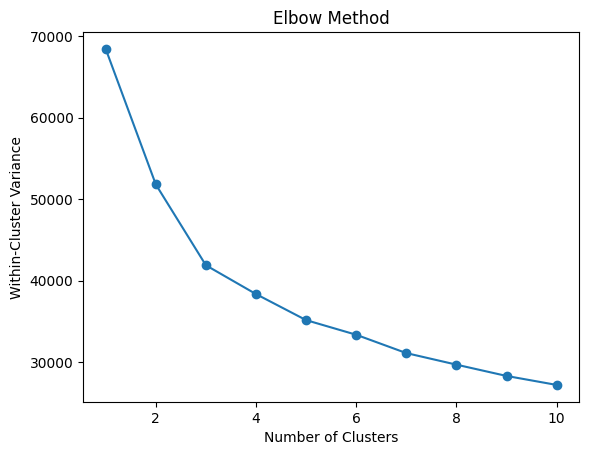

In [45]:
plt.plot(range(1, 11), wcv, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Variance')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=3, n_init=10, init='k-means++', random_state=0)
labels = kmeans.fit_predict(x)

In [47]:
pd.Series(labels).value_counts()

0    2514
2    1074
1     215
Name: count, dtype: int64

In [48]:
df['furnish_type'] = labels

In [49]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'furnishDetails', 'features',
       'super_builtup_area_sqft', 'builtup_area', 'carpet_area', 'study room',
       'servant room', 'store room', 'pooja room', 'others', 'Exhaust Fan',
       'Modular Kitchen', 'Curtains', 'TV', 'Water Purifier', 'Dining Table',
       'Stove', 'Chimney', 'Fan', 'Wardrobe', 'AC', 'Sofa', 'Bed', 'Microwave',
       'Geyser', 'Washing Machine', 'Light', 'Fridge', 'furnish_type'],
      dtype='object')

In [50]:
df.drop(columns=['furnishDetails','Water Purifier','Modular Kitchen', 'Washing Machine', 'Fan', 'Dining Table', 'Light',
                 'Wardrobe', 'Stove', 'Bed', 'Microwave', 'Sofa', 'Chimney', 'Curtains',
                 'AC', 'Geyser', 'Fridge', 'Exhaust Fan', 'TV',], inplace=True)

In [51]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'features',
       'super_builtup_area_sqft', 'builtup_area', 'carpet_area', 'study room',
       'servant room', 'store room', 'pooja room', 'others', 'furnish_type'],
      dtype='object')

# (5) features

In [52]:
df['features']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']
1                                                                                                                                                                                                                                                                                          

In [61]:
df['features'].isnull().sum()

np.int64(635)

In [63]:
import ast
# Define your weights dictionary (as before)
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Safe parsing and scoring function
def safe_parse_and_score(features):
    if pd.isna(features):
        return 0
    try:
        feature_list = ast.literal_eval(features)
        if not isinstance(feature_list, list):
            return 0
        return sum(weights.get(f, 0) for f in feature_list)
    except (ValueError, SyntaxError):
        return 0

# Apply the function
df['luxury_score'] = df['features'].apply(safe_parse_and_score)


In [64]:
df['luxury_score']

0        28
1        37
2        36
3        76
4         0
5         0
6         0
7        60
8        58
9       100
10       49
11       44
12        0
13        0
14       15
15        0
16        0
17       49
18      104
19       49
20       38
21       49
22        0
23       95
24       72
25        0
26        0
27       49
28       42
29        0
30        0
31      119
32       14
33        0
34        0
35       72
36       83
37      109
38      103
39       15
40       67
41       49
42      130
43        0
44       46
45      102
46       97
47      110
48       72
49       38
50       52
51       49
52       16
53       46
54       44
55       22
56       37
57        0
58       80
59       37
60       97
61      109
62       62
63       51
64        0
65        0
66       50
67        0
68       49
69       37
70       43
71       90
72       44
73       42
74      111
75        0
76       95
77       75
78        0
79       15
80      105
81       38
82       58
83  

In [65]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'features',
       'super_builtup_area_sqft', 'builtup_area', 'carpet_area', 'study room',
       'servant room', 'store room', 'pooja room', 'others', 'furnish_type',
       'luxury_score'],
      dtype='object')

In [67]:
df.drop(columns=['areaWithType', 'features', 'agePossession', 'additionalRoom']).sample(5)

,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,super_builtup_area_sqft,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnish_type,luxury_score
1335,flat,emaar gurgaon greens,sector 102,1.35,10800.0,1250.0,3,4,3+,9th of 14 Floors,North-East,1650.0,1400.0,1250.0,0,1,0,1,0,2,174
3765,house,sector 57 huda,sector 57,3.80,26063.0,1458.0,8,8,3+,4.0,East,NaN,162.0,160.0,0,0,1,1,0,2,94
2471,flat,milan cghs 9,sector 39,2.00,8333.0,2400.0,3,3,3+,Ground of 1 Floors,NaN,NaN,2400.0,NaN,0,0,0,0,0,0,0
1542,flat,ss the leaf,sector 85,2.15,10924.0,1968.0,4,5,3+,6th of 12 Floors,South,2812.0,NaN,1968.0,0,1,0,0,0,0,156
534,flat,antriksh heights,sector 84,0.49,4355.0,1125.0,2,2,2,16th of 19 Floors,East,1125.0,NaN,NaN,0,0,0,0,0,0,66


**I was unable to  merge and use the appartment file so i skiped it and used gpt to finish the rest of the work of converting Luxrary score.  
I am not using this dataset.**

In [54]:
# app_df = pd.read_csv('appartments.csv')

In [55]:
# app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [56]:
# temp_df = df[df['features'].isnull()]

In [57]:
# x = temp_df.merge(app_df, left_on='society', right_on='PropertyName', how='left')['TopFacilities']

In [58]:
# df.loc[temp_df.index, 'features'] = x.value_counts

In [59]:
# df['features']



